### Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


### Loading the Datasets

In [2]:
df1=pd.read_csv('ResaleFlatPricesBasedonApprovalDate19901999.csv')
df2=pd.read_csv('ResaleFlatPricesBasedonApprovalDate2000Feb2012.csv')
df3=pd.read_csv('ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv')

### Creating a function to remove duplicates

In [3]:
def remove_duplicates(dataframe,df_variable):
    a=len(dataframe)
    print(f'Original length of dataframe {df_variable}',a)
    dataframe.drop_duplicates(inplace=True)
    b=len(dataframe)
    print(f'Dataframe {df_variable} length after dropping duplicate rows',b)
    print('No of duplicate rows removed',a-b)

In [4]:
remove_duplicates(df1,'df1')

Original length of dataframe df1 287196
Dataframe df1 length after dropping duplicate rows 286370
No of duplicate rows removed 826


In [5]:
remove_duplicates(df2,'df2')

Original length of dataframe df2 369651
Dataframe df2 length after dropping duplicate rows 369138
No of duplicate rows removed 513


In [6]:
remove_duplicates(df3,'df3')

Original length of dataframe df3 164824
Dataframe df3 length after dropping duplicate rows 164547
No of duplicate rows removed 277


### Concatenating all three datasets to a single dataset

In [7]:
df=pd.concat([df1,df2,df3])

In [8]:
df.shape

(820055, 11)

In [9]:
((df1.shape),(df2.shape),(df3.shape))

((286370, 10), (369138, 10), (164547, 11))

In [10]:
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN


In [11]:
df['month']=df['month'].astype('datetime64[ns]')

df['year'] = pd.DatetimeIndex(df['month']).year
df['month_'] = pd.DatetimeIndex(df['month']).month

df[['month_','year']].head()

,month_,year
0,1,1990
1,1,1990
2,1,1990
3,1,1990
4,1,1990


### Plotting the target variable to get insights

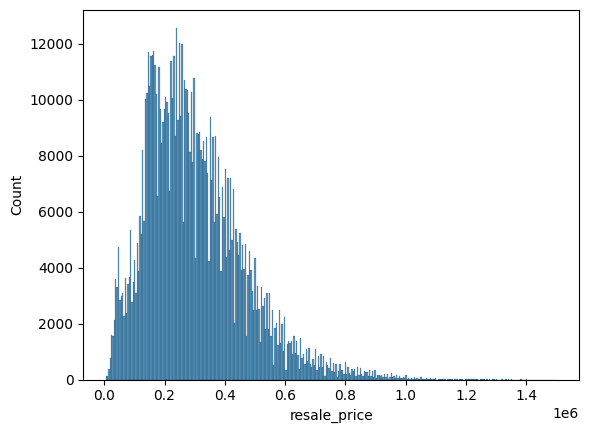

In [12]:
sns.histplot(df['resale_price'])
plt.show()

In [13]:
df['resale_price'].describe()

count    8.200550e+05
mean     3.014311e+05
std      1.633484e+05
min      5.000000e+03
25%      1.800000e+05
50%      2.750000e+05
75%      3.900000e+05
max      1.500000e+06
Name: resale_price, dtype: float64

### Finding null values in the dataset

In [14]:
pd.DataFrame({'dtypes':df.dtypes,'null_count':df.isnull().sum(),
              'unique_values':df.nunique(),
             'percent_of_null_values':df.isnull().mean()})

,dtypes,null_count,unique_values,percent_of_null_values
month,datetime64[ns],0,348,0.000000
town,object,0,27,0.000000
flat_type,object,0,8,0.000000
block,object,0,2689,0.000000
street_name,object,0,582,0.000000
storey_range,object,0,17,0.000000
floor_area_sqm,float64,0,209,0.000000
flat_model,object,0,34,0.000000
lease_commence_date,int64,0,56,0.000000
resale_price,float64,0,8799,0.000000


Only **'remaining_lease'** column has 80% of missing values, so I'll just drop the column.

In [15]:
df.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price',
       'remaining_lease', 'year', 'month_'],
      dtype='object')

### Keeping only the selected columns

In [16]:
df=df[[ 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price',
        'year', 'month_']]

### Segragating categorical and numerical columns

In [17]:
#categorical columns list
cc=[]
#numerical columns list
nc=[]
for i in df.columns:
    if df[i].dtype=='O':
        cc.append(i)
    else:
        nc.append(i)
print('categorical_columns:',cc)
print()
print('numerical_columns:',nc)

categorical_columns: ['town', 'flat_type', 'block', 'street_name', 'storey_range', 'flat_model']

numerical_columns: ['floor_area_sqm', 'lease_commence_date', 'resale_price', 'year', 'month_']


### Finding outliers in numerical columns and replacing it with upper and lower limit values respectively

In [18]:
def plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

   # boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')
    plt.show()

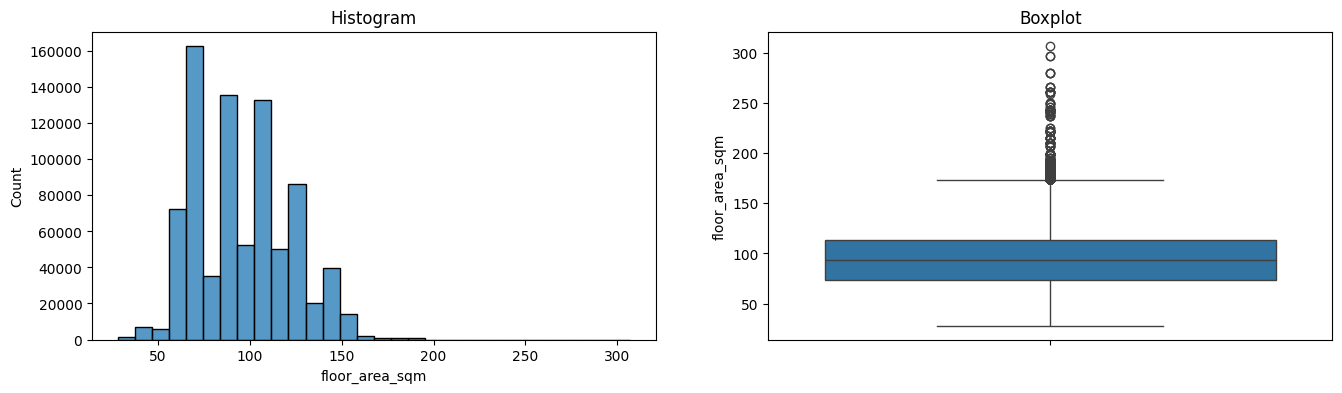

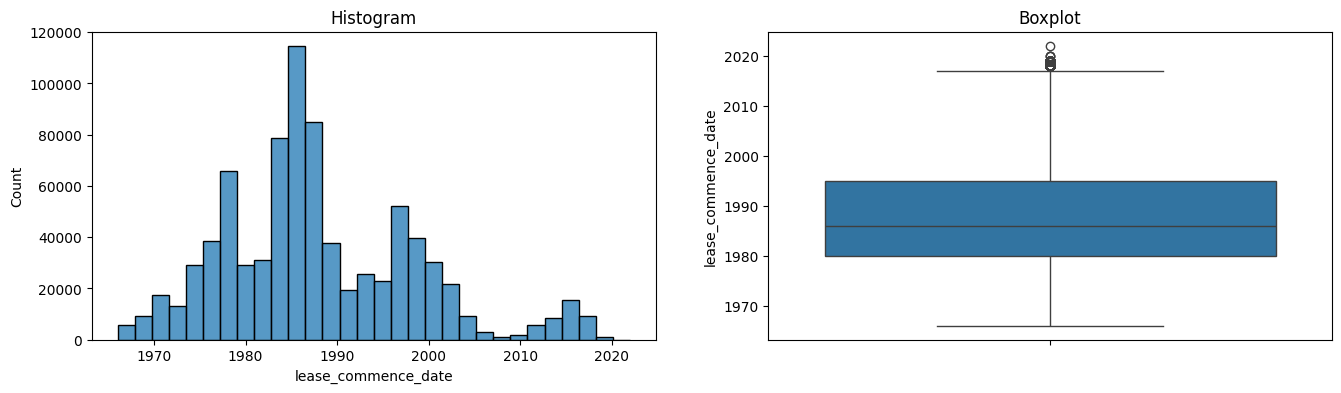

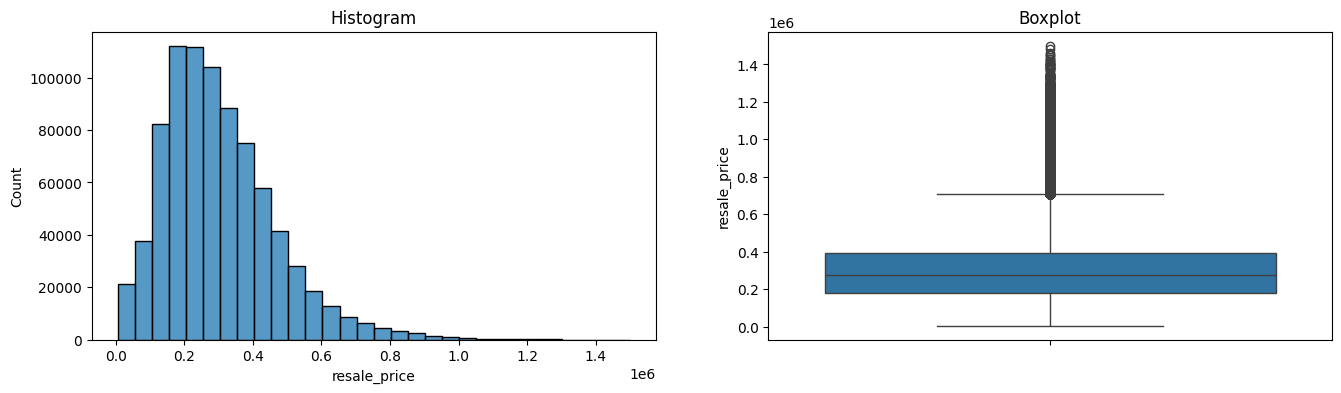

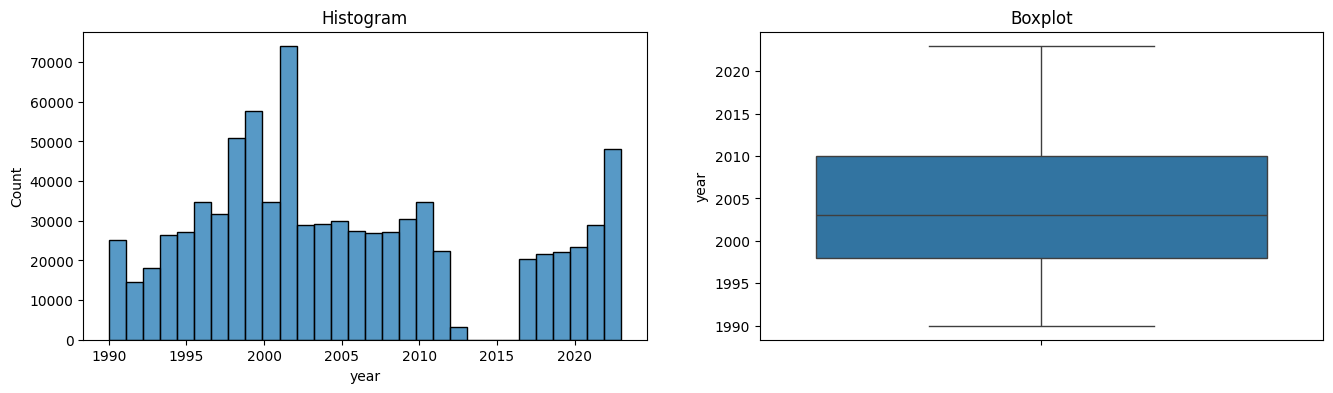

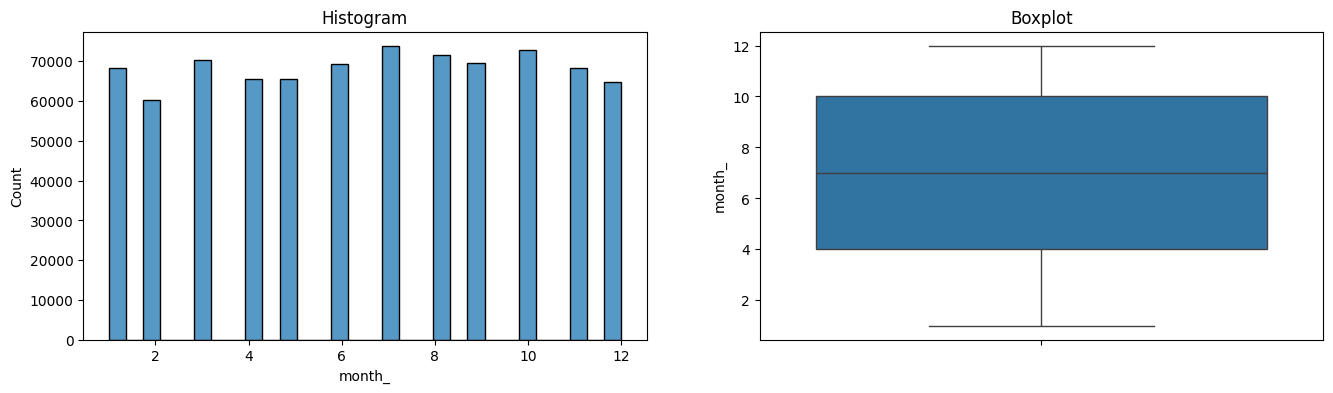

In [19]:
for col in nc:
    plots(df, col)

In [20]:
def find_skewed_boundaries(df, variable, distance):

    # Calculating the boundaries outside which sit the outliers
    # for skewed distributions


    IQR = round(df[variable].quantile(0.75) - df[variable].quantile(0.25))

    lower_boundary = abs(round(df[variable].quantile(0.25) - (IQR * distance)))
    upper_boundary = abs(round(df[variable].quantile(0.75) + (IQR * distance)))

    return upper_boundary, lower_boundary

In [21]:
ul=[]
for v in nc:
    upper_limit, lower_limit = find_skewed_boundaries(df, v, 1.5)
    ul.append((v,upper_limit, lower_limit))

In [22]:
def replace_outlier(dataset,variable,upper_limit,lower_limit):
    dataset[variable]= np.where(dataset[variable] > upper_limit, upper_limit,
                       np.where(dataset[variable] < lower_limit, lower_limit, dataset[variable]))

In [23]:
for v1 in range(len(ul)):
    replace_outlier(df,ul[v1][0],ul[v1][1],ul[v1][2])

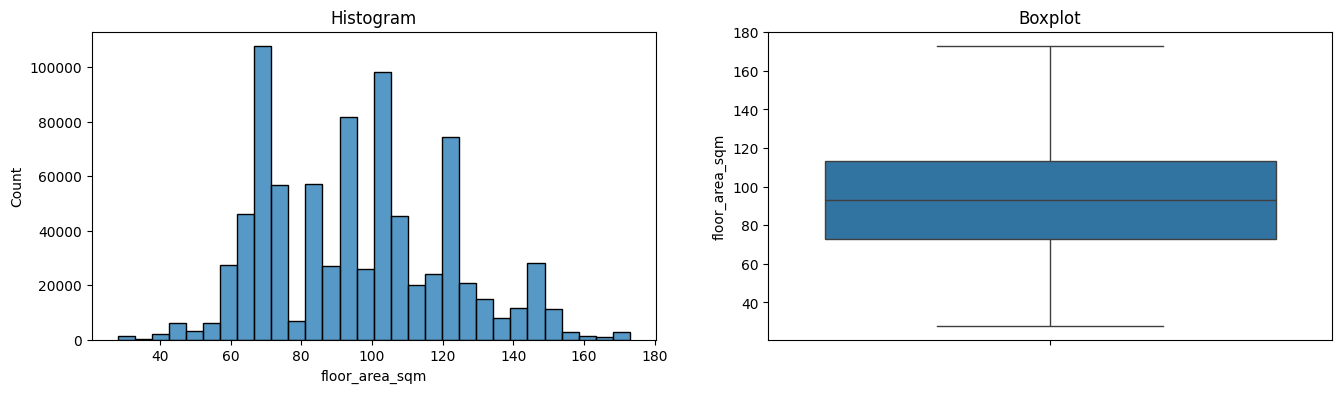

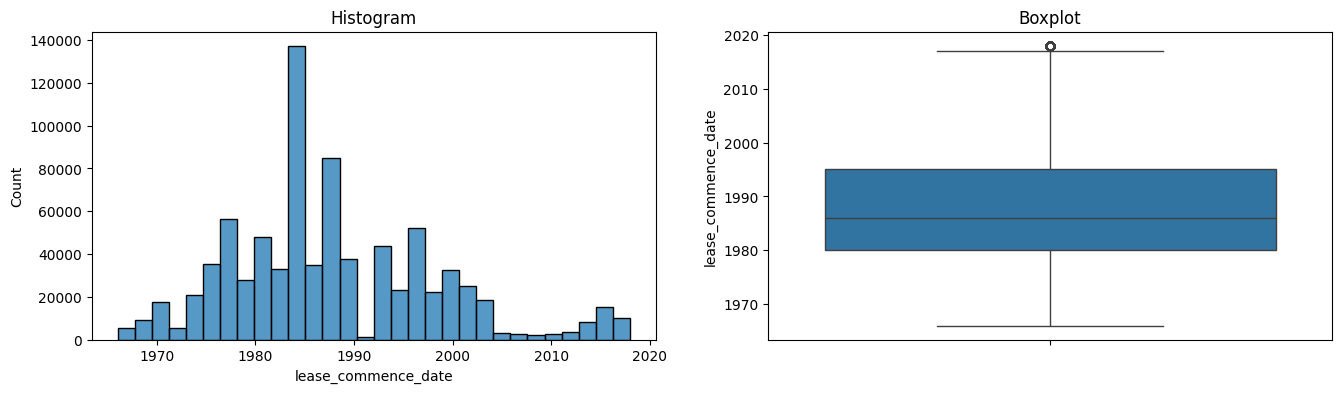

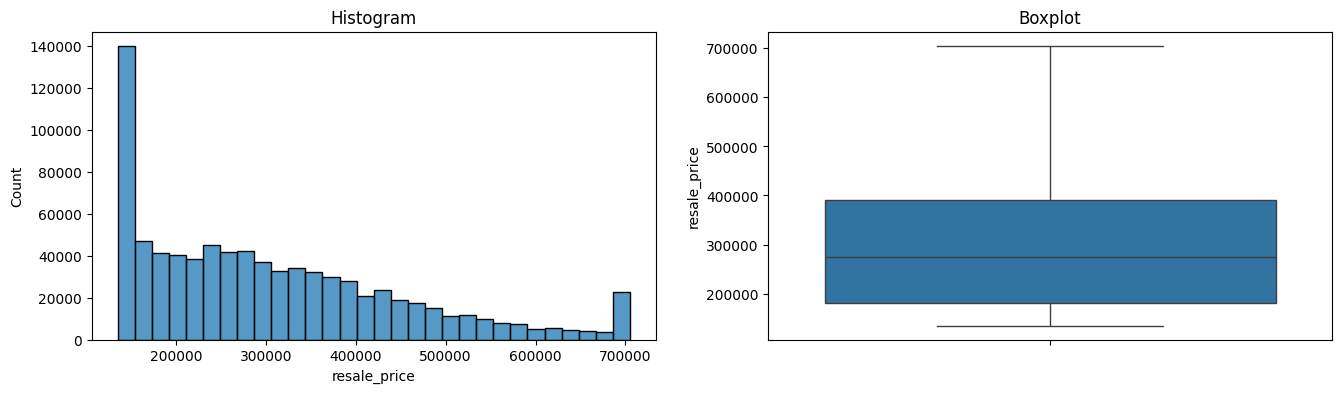

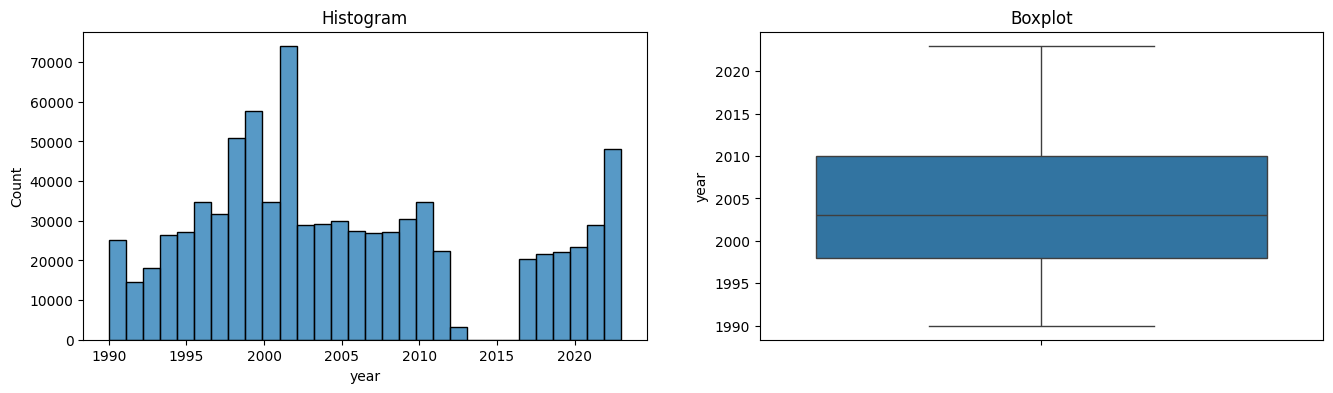

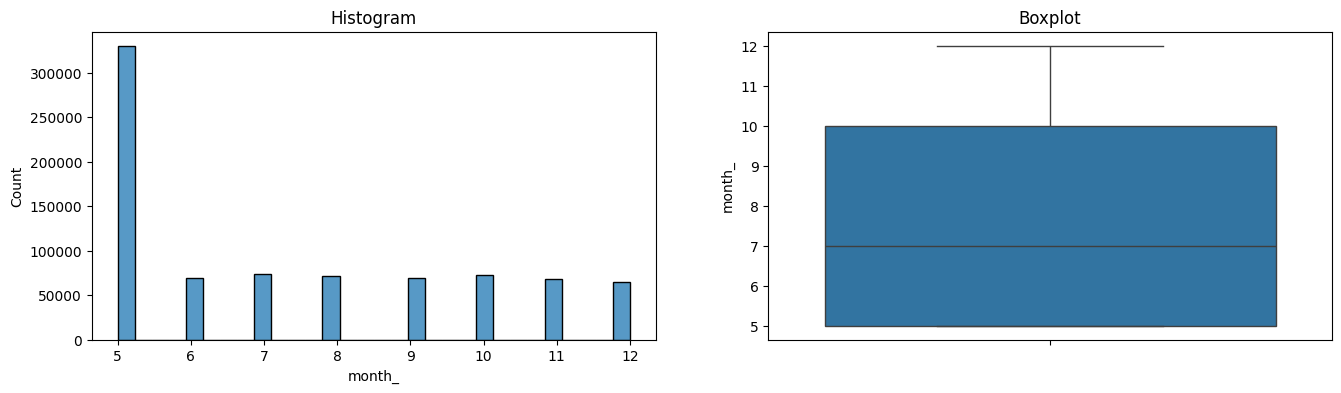

In [24]:
for col in nc:
    plots(df, col)

### Changing the distribution of the 'resale_price' column

In [25]:
# for Q-Q plots
import scipy.stats as stats
from sklearn.preprocessing import FunctionTransformer

def diagnostic_plots(df, variable):

    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable

    plt.figure(figsize=(15, 6))

    # histogram
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    plt.title(f"Histogram of {variable}")

    # q-q plot
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.title(f"Q-Q plot of {variable}")

    plt.show()

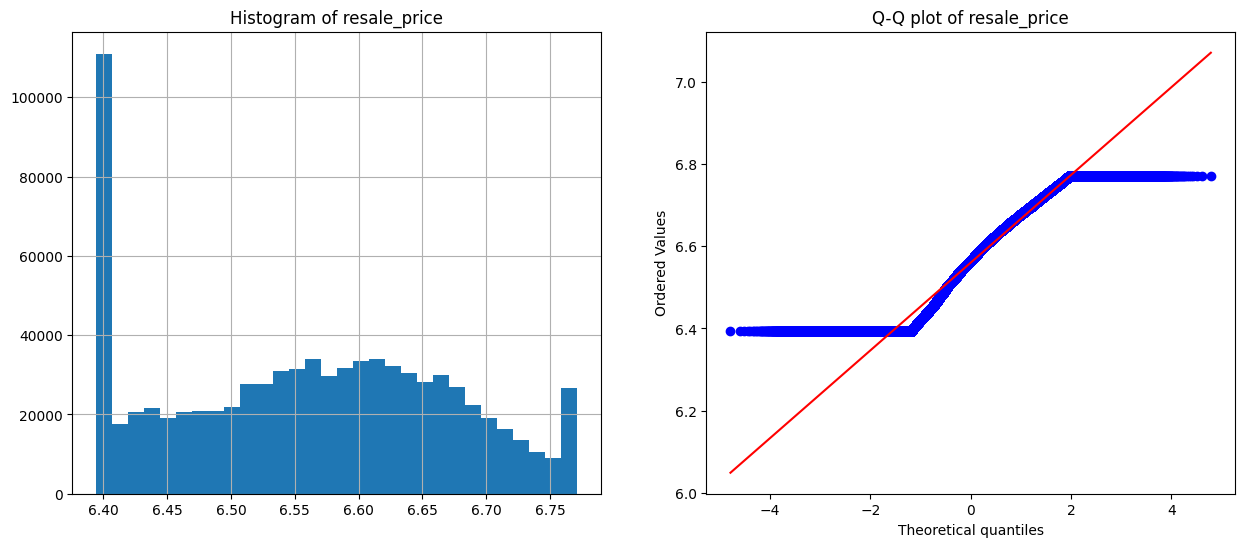

In [26]:
# with open-source packages
from sklearn.preprocessing import PowerTransformer

#transforming the 'resale_price' column using "box-cox"
transformer1 = PowerTransformer(method="box-cox", standardize=False)
transformer1.fit(df[['resale_price']])
# transformer1.set_output(transform="pandas")
df['resale_price']= transformer1.transform(df[['resale_price']])

diagnostic_plots(df, 'resale_price')

In [27]:
from sklearn.model_selection import train_test_split

# for encoding with feature-engine
from feature_engine.encoding import MeanEncoder

In [28]:
y=df['resale_price']
X=df[['town', 'flat_type', 'block', 'street_name', 'storey_range', 'flat_model', 'year', 'month_',
     'floor_area_sqm', 'lease_commence_date']]


X_train, X_test, y_train, y_test = train_test_split(
    X,  # predictors
    y,  # target
    test_size=0.20,  # percentage of obs in test set
    random_state=0,
)  # seed to ensure reproducibility

X_train.shape, X_test.shape

((656044, 10), (164011, 10))

In [29]:
mean_enc = MeanEncoder(variables=cc) #cc- categorical columns
mean_enc.fit(X_train, y_train)

MeanEncoder(variables=['town', 'flat_type', 'block', 'street_name',
                       'storey_range', 'flat_model'])

In [30]:
X_train = mean_enc.transform(X_train)
X_test = mean_enc.transform(X_test)

# let's explore the result
X_train.head()

C:\Users\DELL\anaconda3\envs\rent_price_ml\lib\site-packages\feature_engine\encoding\base_encoder.py:255: UserWarning: During the encoding, NaN values were introduced in the feature(s) block.
  warnings.warn(


,town,flat_type,block,street_name,storey_range,flat_model,year,month_,floor_area_sqm,lease_commence_date
107429,6.563371,6.639957,6.562165,6.577941,6.550483,6.600606,2002,12,121.0,1988
11688,6.634423,6.571829,6.557065,6.624398,6.552779,6.596822,2000,5,107.0,1996
211935,6.634423,6.639957,6.507811,6.611485,6.545676,6.520748,1998,9,140.0,1993
155602,6.545782,6.571829,6.554139,6.502528,6.545676,6.452082,1997,5,94.0,1982
57082,6.563371,6.471105,6.529766,6.577941,6.545676,6.526554,2019,9,64.0,1986


### Checking for null values in the test set and dropping the row(s) in X_test and y_test

In [31]:
X_test.isnull().sum()

town                   0
flat_type              0
block                  1
street_name            0
storey_range           0
flat_model             0
year                   0
month_                 0
floor_area_sqm         0
lease_commence_date    0
dtype: int64

In [32]:
X_test[X_test['block'].isnull()]

,town,flat_type,block,street_name,storey_range,flat_model,year,month_,floor_area_sqm,lease_commence_date
163126,6.52956,6.571829,NaN,6.52295,6.598866,6.596822,2023,10,93.0,2018


In [33]:
X_test=X_test.drop([163126])
y_test=y_test.drop([163126])

In [34]:
X_test.isnull().sum()

town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
flat_model             0
year                   0
month_                 0
floor_area_sqm         0
lease_commence_date    0
dtype: int64

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import HistGradientBoostingRegressor

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_squared_error

In [36]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [37]:
# Let's train a linear model.

# Instantiate a linear model.
linreg = LinearRegression()

# Train the model.
linreg.fit(scaler.transform(X_train), y_train)

# Make predictions on the train set and calculate
# the mean squared error.
print('Train set')
pred_train = linreg.predict(scaler.transform(X_train))
print('Linear Regression rmse: {}'.format(np.sqrt(mean_squared_error(y_train, pred_train))))
print('Linear Regression r2-score: {}'.format(r2_score(y_train, pred_train)))
# Make predictions on the test set and calculate
# the mean squared error.
print('Test set')
pred_test = linreg.predict(scaler.transform(X_test))
print('Linear Regression rmse: {}'.format(np.sqrt(mean_squared_error(y_test, pred_test))))
print('Linear Regression r2-score: {}'.format(r2_score(y_test, pred_test)))
print()

Train set
Linear Regression rmse: 0.047128324284942985
Linear Regression r2-score: 0.8133398639843566
Test set
Linear Regression rmse: 0.047208802037903765
Linear Regression r2-score: 0.8127056976835741



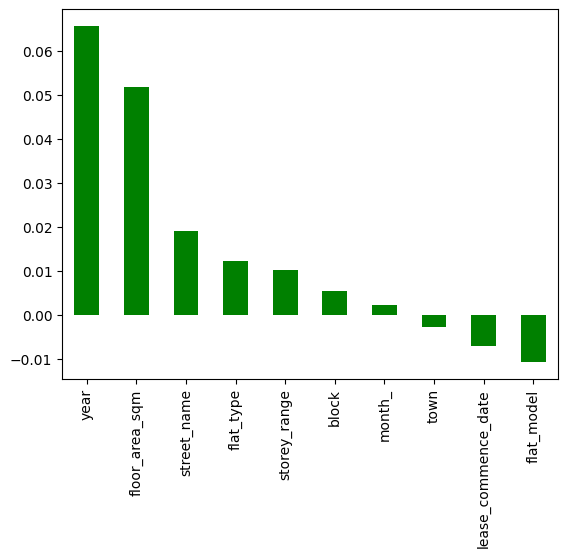

In [38]:
pd.Series(linreg.coef_,index=(X_train.columns)).sort_values(ascending=False).plot.bar(color='green')
plt.show()

In [39]:
X_train.columns

Index(['town', 'flat_type', 'block', 'street_name', 'storey_range',
       'flat_model', 'year', 'month_', 'floor_area_sqm',
       'lease_commence_date'],
      dtype='object')

### Running the model again with only 3 selected features

In [40]:
scaler.fit(X_train[[   'street_name', 'year','floor_area_sqm',]])

StandardScaler()

In [41]:
# Let's train a linear model.

# Instantiate a linear model.
linreg = LinearRegression()

# Train the model.
linreg.fit(scaler.transform(X_train[[  'street_name', 
       'year','floor_area_sqm']]), y_train)

# Make predictions on the train set and calculate
# the mean squared error.
print('Train set')
pred_train = linreg.predict(scaler.transform(X_train[[  'street_name', 
       'year','floor_area_sqm',]]))
print('Linear Regression rmse: {}'.format(np.sqrt(mean_squared_error(y_train, pred_train))))
print('Linear Regression r2-score: {}'.format(r2_score(y_train, pred_train)))
# Make predictions on the test set and calculate
# the mean squared error.
print('Test set')
pred_test = linreg.predict(scaler.transform(X_test[[  'street_name', 
       'year','floor_area_sqm',]]))
print('Linear Regression rmse: {}'.format(np.sqrt(mean_squared_error(y_test, pred_test))))
print('Linear Regression r2-score: {}'.format(r2_score(y_test, pred_test)))
print()

Train set
Linear Regression rmse: 0.04946421079105918
Linear Regression r2-score: 0.7943779189226332
Test set
Linear Regression rmse: 0.04947155006178543
Linear Regression r2-score: 0.7943211468575193



In [42]:
scaler.fit(X_train[[   'street_name', 'year','floor_area_sqm']])

StandardScaler()

In [43]:
hist_regressor = HistGradientBoostingRegressor(learning_rate=0.01,max_leaf_nodes=200,max_depth=100,
                                               max_iter=1000,
                                               random_state=2023)

# Train the model.
hist_regressor.fit(scaler.transform(X_train[[  'street_name', 
       'year','floor_area_sqm']]), y_train)

# Make predictions on the train set and calculate
# the mean squared error.
print('Train set')
pred = hist_regressor.predict(scaler.transform(X_train[[  'street_name', 'year','floor_area_sqm']]))
print('HistGradientBoostingRegressor rmse: {}'.format(np.sqrt(mean_squared_error(y_train, pred))))
print('HistGradientBoostingRegressor r2-score: {}'.format(r2_score(y_train, pred)))
# Make predictions on the test set and calculate
# # the mean squared error.
print('Test set')
pred = hist_regressor.predict(scaler.transform(X_test[[  'street_name', 'year','floor_area_sqm']]))
print('HistGradientBoostingRegressor rmse: {}'.format(np.sqrt(mean_squared_error(y_test, pred))))
print('HistGradientBoostingRegressor r2-score: {}'.format(r2_score(y_test, pred)))
print()

Train set
HistGradientBoostingRegressor rmse: 0.02139425395441235
HistGradientBoostingRegressor r2-score: 0.961533570614941
Test set
HistGradientBoostingRegressor rmse: 0.02157840724319442
HistGradientBoostingRegressor r2-score: 0.9608693216911157



### Inverse transforming the target column and comparing the 'actual' and 'predicted' values

In [44]:
u1=pd.concat([y_train,y_test],axis=0)
u2=pd.concat([pd.Series(pred_train),pd.Series(pred_test)],axis=0)

pred=transformer1.inverse_transform(pd.DataFrame(u2,columns=['resale_price']))
y= transformer1.inverse_transform(u1.values.reshape(-1, 1))
x=pd.DataFrame({'rv':list(y),'pv':list(pred)})
x['residuals']=(x['rv']-x['pv'])
x['error']=(((x['rv']-x['pv']))/(x['rv']))

x['residuals_cor']=[i[0] for i in x['residuals']]
x['error_cor']=[i[0] for i in x['error']]
x[['rv','pv','residuals_cor','error_cor']].head()

C:\Users\DELL\anaconda3\envs\rent_price_ml\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(


,rv,pv,residuals_cor,error_cor
0,[287000.0000000001],[321727.5715184214],-34727.571518,-0.121002
1,[306500.0000000011],[278897.0146109292],27602.985389,0.090059
2,[392000.00000000064],[358474.91590983025],33525.084090,0.085523
3,[279999.99999999977],[197245.5447000169],82754.455300,0.295552
4,[263888.0000000011],[304129.8724795242],-40241.872480,-0.152496


In [45]:
x['residuals_cor'].max(),x['residuals_cor'].min()

(451858.36568918807, -528375.9299633696)

In [46]:
round(list(x['error'].max())[0],2),round(list(x['error'].min())[0],2)

(0.65, -2.35)

In [47]:
x['residuals_cor'].describe()

count    820054.000000
mean       6821.494207
std       73855.268025
min     -528375.929963
25%      -34877.818499
50%       -3809.238525
75%       39999.568408
max      451858.365689
Name: residuals_cor, dtype: float64

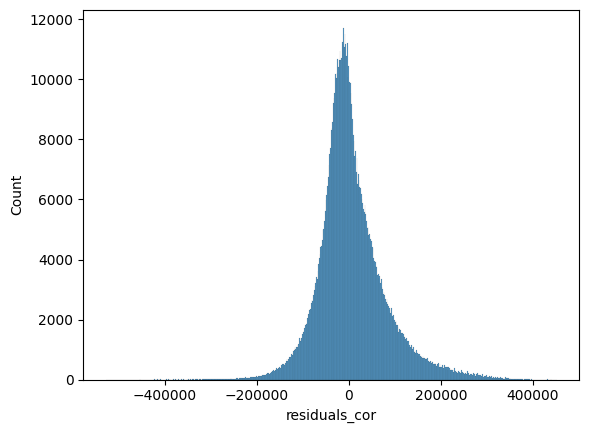

In [48]:
sns.histplot(x['residuals_cor'])
plt.show()

### From 10 independent features , by conducting various analysis and tests I've selected only 3 features to predict the target variable successfully